In [77]:
import pandas as pd
from sklearn import *
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from statistics import mean
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Part 1: Build a classification model using text data


## CountVectorizer()


In [78]:
import aimodelshare as ai

(
    X_train,
    X_test,
    y_train_labels,
    y_test_labels,
    example_data,
    lstm_model,
    lstm_model2,
) = ai.import_quickstart_data("clickbait")



Data downloaded successfully.

Preparing downloaded files for use...

Success! Your Quick Start materials have been downloaded. 
You are now ready to run the tutorial.


In [122]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [79]:
vec = CountVectorizer().fit(X_train)
X_train = vec.transform(X_train)
#vec2 = CountVectorizer().fit(X_test)
X_test = vec.transform(X_test)


In [154]:
X_train

<24979x20332 sparse matrix of type '<class 'numpy.int64'>'
	with 220242 stored elements in Compressed Sparse Row format>

In [80]:
log = LogisticRegression(C=10, max_iter=1000, random_state=35).fit(X_train, y_train_labels)

# logcv = cross_val_score(log, X_train, y_train_labels, scoring='f1', cv=10, n_jobs=-1, error_score='raise')
logcv = cross_val_score(
    log,
    X_train,
    y_train_labels,
    scoring="roc_auc",
    cv=10,
    n_jobs=-1,
    error_score="raise",
)
logcv.mean()


0.996085396897193

In [83]:
print("Training Accuracy :", log.score(X_train, y_train_labels))
#print("Testing Accuracy :", log.score(X_test, y_test_labels))

# calculating the f1 score for the validation set
y_pred = log.predict(X_test)
print("Test set F1 score :", f1_score(y_test_labels, y_pred, average="macro"))


Training Accuracy : 0.9998398654870091
Test set F1 score : 0.9735322772135928


In [40]:
def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

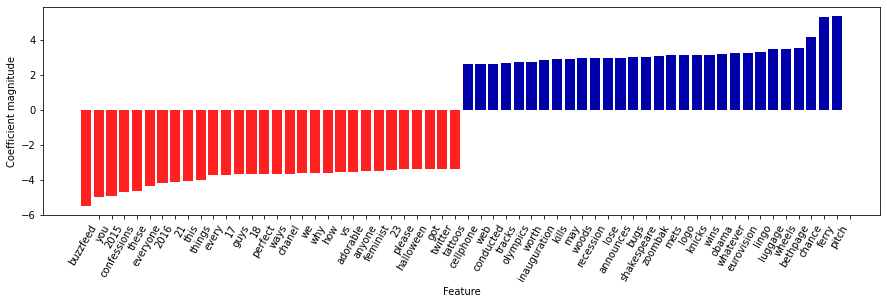

In [41]:
coefs = log.coef_
feature_names = vec.get_feature_names_out()

visualize_coefficients(coefs, feature_names, n_top_features=30)

## TF-IDF


In [135]:
import aimodelshare as ai

(
    X_train,
    X_test,
    y_train_labels,
    y_test_labels,
    example_data,
    lstm_model,
    lstm_model2,
) = ai.import_quickstart_data("clickbait")



Data downloaded successfully.

Preparing downloaded files for use...

Success! Your Quick Start materials have been downloaded. 
You are now ready to run the tutorial.


In [136]:
tfidf = TfidfVectorizer(min_df=5, norm=None).fit(X_train)
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)


In [137]:
X_train

<24979x5510 sparse matrix of type '<class 'numpy.float64'>'
	with 196141 stored elements in Compressed Sparse Row format>

In [32]:
log = LogisticRegression(C=10, max_iter=1000, random_state=35).fit(X_train, y_train_labels)

# logcv = cross_val_score(log, X_train, y_train_labels, scoring='f1', cv=10, n_jobs=-1, error_score='raise')
logcv = cross_val_score(
    log,
    X_train,
    y_train_labels,
    scoring="roc_auc",
    cv=10,
    n_jobs=-1,
    error_score="raise",
)
logcv.mean()


0.9927761120826164

In [33]:
y_pred = log.predict(X_test)

print("Training Accuracy :", log.score(X_train, y_train_labels))
#print("Testing Accuracy :", log.score(X_test, y_test_labels))

# calculating the f1 score for the validation set
print("Test set F1 score :", f1_score(y_test_labels, y_pred, average="macro"))


Training Accuracy : 0.9999599663717522
Test set F1 score : 0.9642478669084689


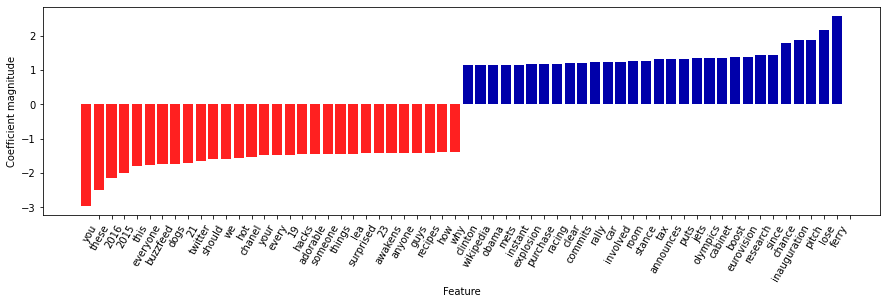

In [34]:
coefs = log.coef_
feature_names = tfidf.get_feature_names_out()

visualize_coefficients(coefs, feature_names, n_top_features=30)

## Bigram


In [84]:
import aimodelshare as ai

(
    X_train,
    X_test,
    y_train_labels,
    y_test_labels,
    example_data,
    lstm_model,
    lstm_model2,
) = ai.import_quickstart_data("clickbait")



Data downloaded successfully.

Preparing downloaded files for use...

Success! Your Quick Start materials have been downloaded. 
You are now ready to run the tutorial.


In [24]:
bi = CountVectorizer(ngram_range=(2,2)).fit(X_train)
X_train = bi.transform(X_train)
#vec2 = CountVectorizer().fit(X_test)
X_test = bi.transform(X_test)


In [25]:
log = LogisticRegression(C=10, max_iter=1000, random_state=35).fit(X_train, y_train_labels)

# logcv = cross_val_score(log, X_train, y_train_labels, scoring='f1', cv=10, n_jobs=-1, error_score='raise')
logcv = cross_val_score(
    log,
    X_train,
    y_train_labels,
    scoring="roc_auc",
    cv=10,
    n_jobs=-1,
    error_score="raise",
)
logcv.mean()


0.9870803681050493

In [26]:
y_pred = log.predict(X_test)

print("Training Accuracy :", log.score(X_train, y_train_labels))
#print("Testing Accuracy :", log.score(X_test, y_test_labels))

# calculating the f1 score for the validation set
print("Test set F1 score :", f1_score(y_test_labels, y_pred, average="macro"))


Training Accuracy : 1.0
Test set F1 score : 0.9265121984228963


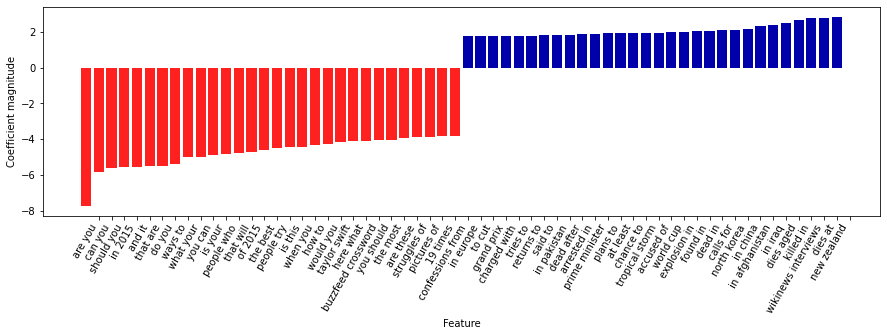

In [29]:
coefs = log.coef_
feature_names = bi.get_feature_names_out()

visualize_coefficients(coefs, feature_names, n_top_features=30)

I would choose the model with standard CountVectorizer tokenizer. The reason is that that model has the highest cross-validation score and the best test set F1 score. The model with TFIDF has a relatively low test set score, and the model with bigram tokenizer has an even lower test set score (for this model, it clearly has some overfitting problems). 

Also, the coefficients for standard CV tokenizer makes more sense to me than the other two. 

Therefore, I would go for the model with standard CountVectorizer tokenizer.

# Part 2: Build a predictive neural network using Keras


In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv')
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [6]:
print(sorted(data.Species.unique()))

['setosa', 'versicolor', 'virginica']


In [2]:
from tensorflow import keras

data = data.iloc[:,1:]
X = data.iloc[:, data.columns != 'Species']
X = np.array(X)
y = data['Species']
y = np.array(y)
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

y = OneHotEncoder().fit_transform(y[:, np.newaxis]).toarray()
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=35)

y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.random import set_seed

np.random.seed(35)
set_seed(35)

model = Sequential([
    Dense(8, input_shape=(4,)),
    Activation('relu'),
    Dense(8),
    Activation('relu'),
    Dense(3),
    Activation('softmax'),
])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 activation_1 (Activation)   (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 139
Trainable params: 139
Non-trainable pa

In [5]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
7/7 [==============================] - 0s 833us/step - loss: 1.1145 - accuracy: 0.0804
Epoch 2/100
7/7 [==============================] - 0s 833us/step - loss: 1.0923 - accuracy: 0.1518
Epoch 3/100
7/7 [==============================] - 0s 667us/step - loss: 1.0729 - accuracy: 0.3036
Epoch 4/100
7/7 [==============================] - 0s 833us/step - loss: 1.0563 - accuracy: 0.4196
Epoch 5/100
7/7 [==============================] - 0s 667us/step - loss: 1.0409 - accuracy: 0.4554
Epoch 6/100
7/7 [==============================] - 0s 834us/step - loss: 1.0271 - accuracy: 0.5000
Epoch 7/100
7/7 [==============================] - 0s 666us/step - loss: 1.0138 - accuracy: 0.5714
Epoch 8/100
7/7 [==============================] - 0s 667us/step - loss: 0.9995 - accuracy: 0.5982
Epoch 9/100
7/7 [==============================] - 0s 667us/step - loss: 0.9859 - accuracy: 0.6339
Epoch 10/100
7/7 [==============================] - 0s 667us/step - loss: 0.9715 - accuracy: 0.6607
Epoch 11/

In [22]:
y_preds = model.predict(X_test)

In [9]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=16)
print("test loss, test acc:", results)

Evaluate on test data
3/3 [==============================] - 0s 1ms/step - loss: 0.2450 - accuracy: 0.9211
test loss, test acc: [0.24500028789043427, 0.9210526347160339]


In [9]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import numpy
import pandas as pd

In [24]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

seed = 35
np.random.seed(seed)
set_seed(35)

def create_model(units):
	model = Sequential()
	model.add(Dense(units, input_dim=4, activation='relu'))
	model.add(Dense(units, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model

learn_rate = [0.001, 0.01, 0.1, 1]
units = [8,16,32,64]

model = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)

param_grid = dict(units=units)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\ch199\AppData\Local\Temp/ipykernel_23904/93594876.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)


Best: 0.911462 using {'units': 64}


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

seed = 35
np.random.seed(seed)
set_seed(35)

model2 = Sequential([
    Dense(64, input_shape=(4,)),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(3),
    Activation('softmax'),
])


model2.summary()
model2.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_258 (Dense)           (None, 64)                320       
                                                                 
 activation_6 (Activation)   (None, 64)                0         
                                                                 
 dense_259 (Dense)           (None, 64)                4160      
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                                 
 dense_260 (Dense)           (None, 3)                 195       
                                                                 
 activation_8 (Activation)   (None, 3)                 0         
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-train

In [26]:
model2.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
7/7 [==============================] - 0s 666us/step - loss: 1.1688 - accuracy: 0.1429
Epoch 2/100
7/7 [==============================] - 0s 667us/step - loss: 1.1093 - accuracy: 0.1964
Epoch 3/100
7/7 [==============================] - 0s 667us/step - loss: 1.0567 - accuracy: 0.5089
Epoch 4/100
7/7 [==============================] - 0s 500us/step - loss: 1.0091 - accuracy: 0.6964
Epoch 5/100
7/7 [==============================] - 0s 833us/step - loss: 0.9651 - accuracy: 0.7054
Epoch 6/100
7/7 [==============================] - 0s 667us/step - loss: 0.9248 - accuracy: 0.7232
Epoch 7/100
7/7 [==============================] - 0s 667us/step - loss: 0.8870 - accuracy: 0.7411
Epoch 8/100
7/7 [==============================] - 0s 833us/step - loss: 0.8500 - accuracy: 0.7321
Epoch 9/100
7/7 [==============================] - 0s 500us/step - loss: 0.8162 - accuracy: 0.7500
Epoch 10/100
7/7 [==============================] - 0s 667us/step - loss: 0.7846 - accuracy: 0.7589
Epoch 11/

In [27]:
print("Evaluate on test data")
results2 = model2.evaluate(X_test, y_test, batch_size=16)
print("test loss, test acc:", results2)

Evaluate on test data
3/3 [==============================] - 0s 1ms/step - loss: 0.2472 - accuracy: 0.9211
test loss, test acc: [0.24715904891490936, 0.9210526347160339]


At first, I run a model with arbitraryly chosen node numbers for the two hidden layers (which is 8). After running GridSearchCV, I find that nodes=64 has the best effect. So, I change the nodes of both hidden layer from 8 to 64.

Comparing the two models, the 8-node model reached a training accuracy of 0.9211, and the 64-node model reached a same training accuray of 0.9211. 

For the test set, the test loss for 8-node model was 0.245, and the accuracy was 0.921. For the 64-node model, the test loss was 0.247, and the test accuracy was 0.921, which is the same as 8-node model. 

From the results, we can tell that although the two model has roughly the same predictive strength, the 64-node model is less efficiency than 8-node model in that 64-node model has more loss.

Therefore, I think the 8-node model, rather than the tuned 64-node model, is better.